# Data Analysis
## Overview

In this notebook, we will look at overall trend and descriptive stats, such as what is the most popular films or the most profitable films, the proportion of MPAA, etc. Based on the general overview of the data described here, we dive deeper into each topic on separate notebooks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("talk")
sns.set_style("darkgrid")

For the sake of time, we are using the profit data, which only contains movies that have budget, revenue information. For more accurate depiction of the overall movie trend without budget/revenue information, use full_data.csv.

In [2]:
#loading data
df = pd.read_csv('data/profit_data.csv', index_col = 0)
df.head(3)

,popularity,vote_count,id_x,adult,original_language,title,vote_average,overview,MPAA,year,...,actors,directors,producers,editors,writers,primary_genre,secondary_genre,new_genre,worldwide_gross_z,domestic_gross_z
0,31.998,2653,189,False,en,sin city: a dame to kill for,6.3,Some of Sin City's most hard-boiled citizens c...,R,2014,...,"Josh Brolin,Mickey Rourke,Jessica Alba,Joseph ...","Frank Miller,Robert Rodriguez","Mark C. Manuel,Sergei Bespalov,Aaron Kaufman,S...",NaN,NaN,Crime,Thriller,Crime,-0.536238,-0.627326
1,14.736,15131,1771,False,en,captain america: the first avenger,6.9,"During World War II, Steve Rogers is a sickly ...",PG-13,2011,...,"Chris Evans,Samuel L. Jackson,Hugo Weaving,Hay...",Joe Johnston,Kevin Feige,NaN,"Jack Kirby,Christopher Markus,Stephen McFeely,...",Action,Adventure,Action,0.796567,1.199239
2,24.337,10020,1865,False,en,pirates of the caribbean: on stranger tides,6.5,Captain Jack Sparrow crosses paths with a woma...,PG-13,2011,...,"Johnny Depp,Geoffrey Rush,Ian McShane,Penélope...",Rob Marshall,NaN,NaN,"Stuart Beattie,Ted Elliott,Terry Rossio,Tim Po...",Action,Adventure,Action,3.523783,1.921499


In [3]:
df.isnull().sum()

popularity              0
vote_count              0
id_x                    0
adult                   0
original_language       0
title                   0
vote_average            0
overview                0
MPAA                  132
year                    0
month                   0
studio                192
production_budget       0
domestic_gross          0
worldwide_gross         0
tconst                  0
primary_title           0
original_title          0
start_year              0
runtime_minutes         0
genres                  0
avg_rating_imdb         0
num_votes_imdb          0
actors                  7
directors              32
producers             135
editors              1048
writers               170
primary_genre           0
secondary_genre        67
new_genre               0
worldwide_gross_z       0
domestic_gross_z        0
dtype: int64

## Dealing with missing data
We don't need actors, directors,producerts, editors, writers information in this notebook. 
So we will drop those columns.  
For Studio, MPAA ratings, and secondary_genre, we will leave them as is since they are categorical data only used selectively.

In [4]:
df.drop(['actors', 'directors', 'producers', 'editors', 'writers'], axis = 1, inplace = True)

## Overall Data

### Number of films 

In [5]:
print(f"We currently have {len(df)} values in our dataset")

We currently have 1193 values in our dataset


In [6]:
print(f"Out of which {df.title.nunique()} films with unique name")

Out of which 1192 films with unique name


Let's make sure that two films with same names are actually two different films.

In [7]:
df[df.duplicated(subset = "title", keep = False)]

,popularity,vote_count,id_x,adult,original_language,title,vote_average,overview,MPAA,year,...,start_year,runtime_minutes,genres,avg_rating_imdb,num_votes_imdb,primary_genre,secondary_genre,new_genre,worldwide_gross_z,domestic_gross_z
37,21.520,3130,20662,False,en,robin hood,6.4,When soldier Robin happens upon the dying Robe...,PG-13,2010,...,2010,140.0,"Action,Adventure,Drama",6.6,239480,Action,Adventure,Action,0.602213,0.401287
2427,23.926,1935,375588,False,en,robin hood,5.9,A war-hardened Crusader and his Moorish comman...,PG-13,2018,...,2018,116.0,"Action,Adventure,Thriller",5.3,41588,Action,Adventure,Action,-0.358084,-0.436024


It seems like they are two different movies. So we are good.

In [1000]:
# Overall look of the numeric data
df.describe()

,popularity,vote_count,id_x,vote_average,year,month,production_budget,domestic_gross,worldwide_gross,start_year,runtime_minutes,avg_rating_imdb,num_votes_imdb,worldwide_gross_z,domestic_gross_z
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1.193000e+03,1.193000e+03,1.193000e+03
mean,18.107340,3090.306790,196646.331098,6.415675,2013.987427,6.675608,53.575063,69.703873,173.389413,2013.987427,109.480302,6.427494,1.422205e+05,2.819762e-17,7.039168e-16
std,8.230732,3560.151418,143094.037557,0.762434,2.669554,3.394807,58.737613,89.178338,247.538101,2.669554,16.855032,0.941635,1.727437e+05,1.000000e+00,1.000000e+00
min,5.590000,23.000000,189.000000,4.100000,2010.000000,1.000000,0.070000,0.000000,0.000000,2010.000000,63.000000,1.600000,1.700000e+01,-7.004555e-01,-7.816234e-01
25%,12.375000,827.000000,62764.000000,5.900000,2012.000000,4.000000,13.500000,16.250000,29.960000,2012.000000,97.000000,5.900000,3.702900e+04,-5.794236e-01,-5.994042e-01
50%,15.968000,1778.000000,160588.000000,6.400000,2014.000000,7.000000,31.000000,40.560000,80.170000,2014.000000,107.000000,6.500000,8.524200e+04,-3.765861e-01,-3.268044e-01
75%,21.520000,4058.000000,315664.000000,6.900000,2016.000000,10.000000,70.000000,85.080000,207.040000,2016.000000,119.000000,7.100000,1.786030e+05,1.359410e-01,1.724200e-01
max,101.014000,26369.000000,532671.000000,8.400000,2019.000000,12.000000,410.600000,700.060000,2048.130000,2019.000000,180.000000,8.800000,1.841066e+06,7.573544e+00,7.068489e+00


### MPAA Distribution

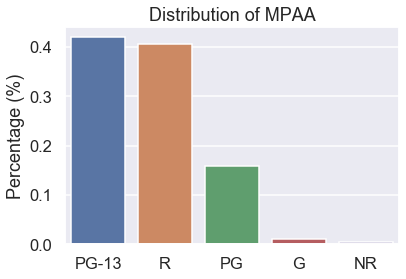

In [1002]:
Y = df.MPAA.value_counts(normalize = True)
X = Y.index

ax = sns.barplot(X, Y)
plt.title("Distribution of MPAA")
plt.ylabel("Percentage (%)")
plt.show()
#ax.figure.savefig("PNG/MPAA_distribution.png")

Mostly PG-13 and R films. Not many films for children.  
This is a good point to think about. We may not have enough number of good movies everyone can watch. 

### Studio Distribution 

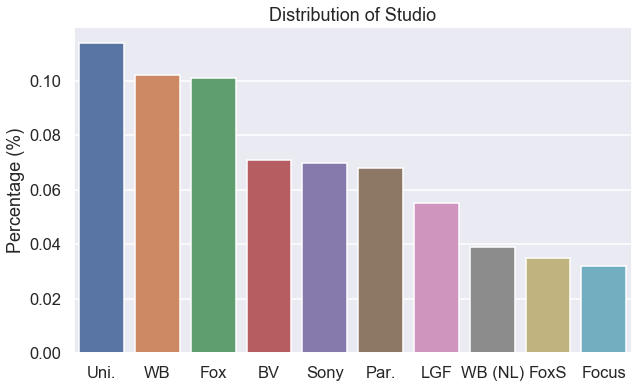

In [869]:
Y = df.studio.value_counts(normalize = True)[0:10]
X = Y.index
plt.figure(figsize = (10, 6))
sns.barplot(X, Y)
plt.title("Distribution of Studio")
plt.ylabel("Percentage (%)")
plt.show()

Universal Studio, Warner Bros, Fox Entertainment is followed by BV(Buena Vista = Disney)

### Original Language distribution

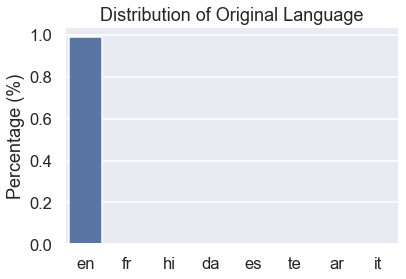

In [870]:
Y = df.original_language.value_counts(normalize = True)[0:10]
X = Y.index

sns.barplot(X, Y)
plt.title("Distribution of Original Language")
plt.ylabel("Percentage (%)")
plt.show()

Mostly English, not surprising since we are dealing with dataset from US companies.

### Budget Distribution

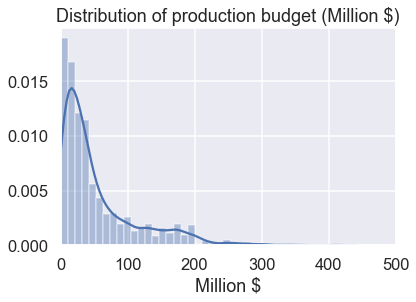

In [871]:
Y = df.production_budget.sort_values()

sns.distplot(Y)
plt.title("Distribution of production budget (Million $)")
plt.xlabel("Million $")
plt.xlim([0, 500])
plt.show()

It seems like most movies have budgets less than $ 50M.

### Gross Distribution (domestic, worldwide)

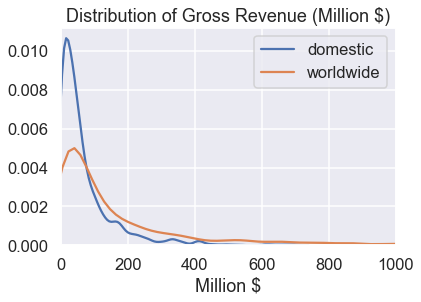

In [872]:
Y = df.domestic_gross.sort_values()
Z = df.worldwide_gross.sort_values()
sns.distplot(Y, label = 'domestic', hist = False)
sns.distplot(Z, label = 'worldwide', hist = False)

plt.title("Distribution of Gross Revenue (Million $)")
plt.legend()
plt.xlabel("Million $")
plt.xlim([0, 1000])
plt.show()

Most domestic movies don't yield gross revenue above $ 100M.  
But worldwide movies do yield higher revenue. Since it's (assuming to be) cumulative measure, this is not surprising.

### Budget to Gross Domestic

In [874]:
# calculating gross revenue per budget ratio
df['rev2bud_dom'] = df.domestic_gross/df.production_budget
df['rev2bud_int'] = df.worldwide_gross/df.production_budget

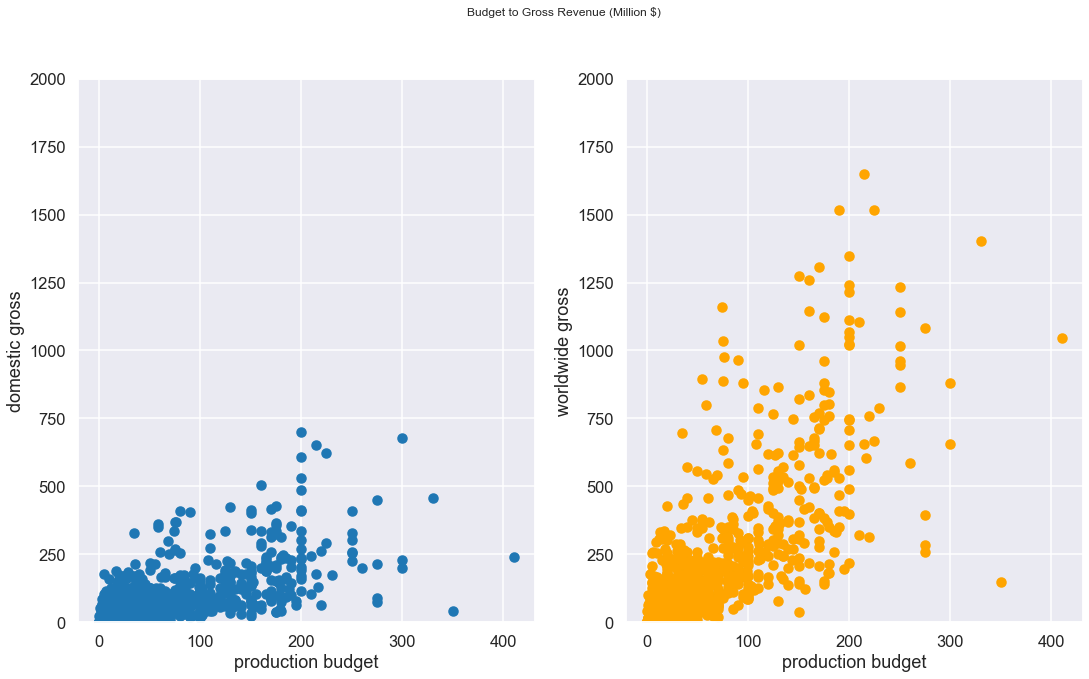

In [9]:
tmp = df[['production_budget', 'domestic_gross', 'worldwide_gross']].sort_values(by = 'production_budget')
X = tmp['production_budget']
Y = tmp['domestic_gross']
Z = tmp['worldwide_gross']

fig = plt.figure(figsize = (18, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(X, Y)
ax2.scatter(X, Z, c = 'orange')

fig.suptitle("Budget to Gross Revenue (Million $)")
ax1.set_ylabel("domestic gross")
ax2.set_ylabel("worldwide gross")
ax1.set_xlabel("production budget")
ax2.set_xlabel("production budget")
ax1.set_ylim([0,2000])
ax2.set_ylim([0,2000])


plt.show()

fig.savefig("PNG/Budget_to_Revenue.png")

In [11]:
import scipy

In [17]:
print(scipy.stats.spearmanr(tmp.production_budget, tmp.domestic_gross))
print(scipy.stats.spearmanr(tmp.production_budget, tmp.worldwide_gross))


SpearmanrResult(correlation=0.6894867795622298, pvalue=4.860099561894579e-169)
SpearmanrResult(correlation=0.7623710623352552, pvalue=2.401526869166269e-227)


Even for some of the lower budget files, they do relatively well in global market.  
Higher production budget seems to pay off slightly better for worldwide gross as well. (correlation is higher). 

What are some of the movies that has small budgets but relatively high worldwide gross?

In [884]:
df[(df.production_budget < 200) & (df.worldwide_gross > 750) & (df.new_genre != "Action")][['title', 'production_budget', 'worldwide_gross', 'new_genre']]

,title,production_budget,worldwide_gross,new_genre
11,shrek forever after,165.0,756.24,Animation
431,ice age: continental drift,95.0,879.77,Animation
831,despicable me 2,76.0,975.22,Animation
916,frozen,150.0,1272.47,Animation
1114,inside out,175.0,854.24,Animation
1385,minions,74.0,1160.34,Animation
1630,fantastic beasts and where to find them,180.0,802.40,Adventure
1688,zootopia,150.0,1019.43,Animation
1746,the jungle book,175.0,962.85,Adventure
2035,beauty and the beast,160.0,1259.20,Family


It seems like animation has the smallest budgets but relatively high worldwide gross, besides action films.

# Subsetting Genres
Some genres don't have enough datapoints to make accurate depiction. We'll select the first 6 and 8 to continue our analyses. 


In [941]:
Y = df['new_genre'].value_counts(normalize = True)
X = Y.index
top8 = X[0:8]
top6 = X[0:6]

### Budget to Gross Revenue Per Genres (Million $)

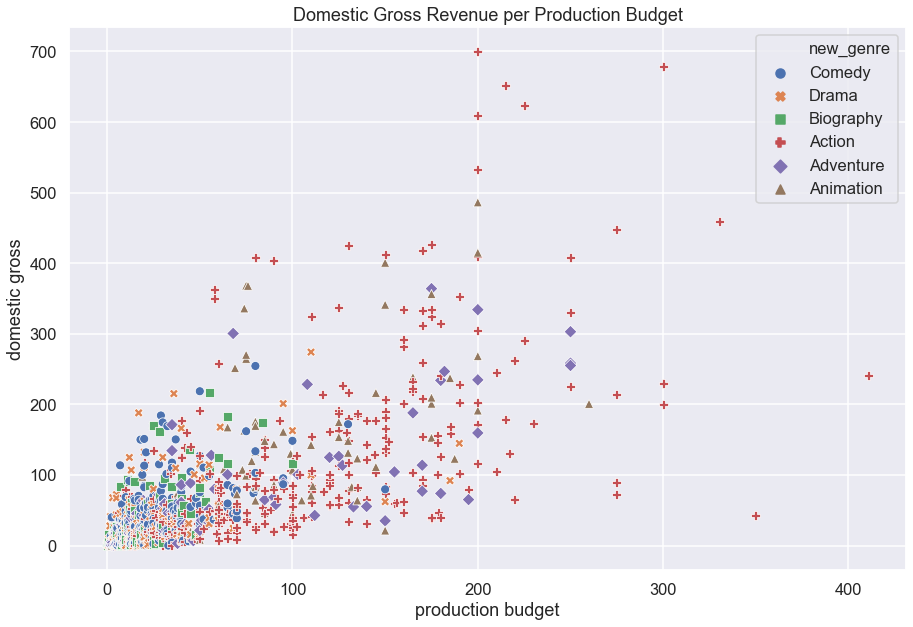

In [927]:
tmp = df[df.new_genre.isin(top6)][['new_genre', "rev2bud_dom", "rev2bud_int",
          'production_budget', 'domestic_gross', 'worldwide_gross']].sort_values(by = 'production_budget')

plt.figure(figsize = (15, 10))
ax1 = sns.scatterplot(x = "production_budget", y = "domestic_gross", 
                       style = "new_genre", hue = "new_genre", data = tmp, alpha = 1)


ax1.set_ylabel("domestic gross")
ax1.set_xlabel("production budget")
ax1.set_title("Domestic Gross Revenue per Production Budget")


plt.show()

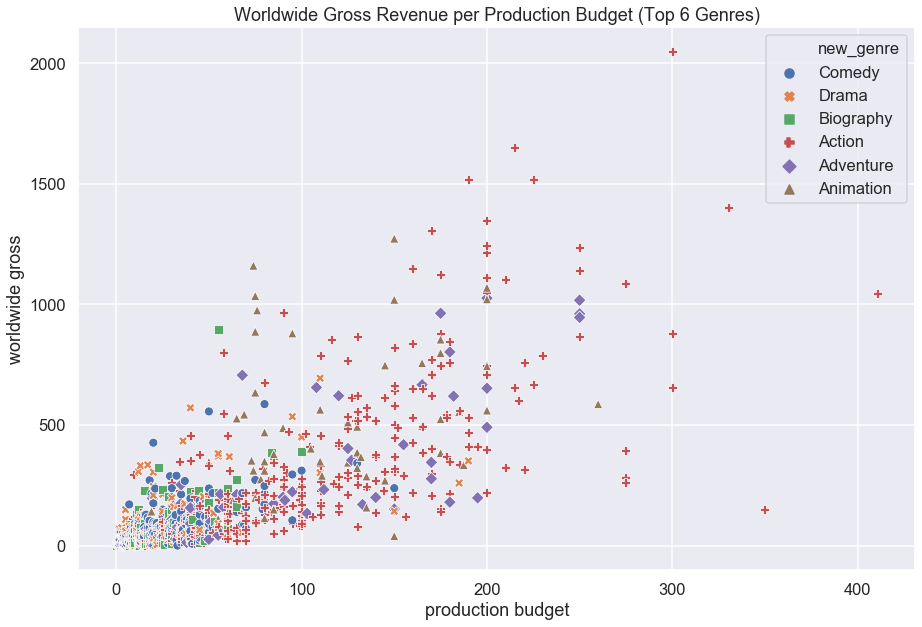

In [937]:

tmp = df[df.new_genre.isin(top6)][[
    'new_genre', 'production_budget', 'domestic_gross', 'worldwide_gross']].sort_values(by = 'production_budget')


plt.figure(figsize = (15, 10))
ax1 = sns.scatterplot(x = "production_budget", y = "worldwide_gross", 
                      style = "new_genre", hue = "new_genre", data = tmp, alpha = 1)


ax1.set_ylabel("worldwide gross")
ax1.set_xlabel("production budget")
ax1.set_title("Worldwide Gross Revenue per Production Budget (Top 6 Genres)")

plt.show()

General budget / gross information per genre. 

### Average Runtimes

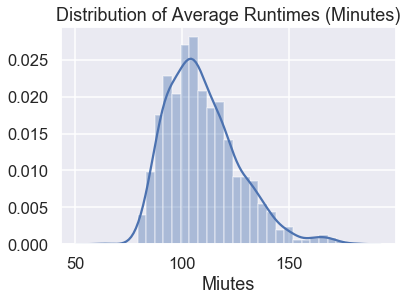

In [929]:
Y = df.runtime_minutes.dropna().sort_values()

sns.distplot(Y)

plt.title("Distribution of Average Runtimes (Minutes)")
plt.xlabel("Miutes")
plt.show()

Most movies are around an hour to 2.5 hrs.

### Genres Distribution

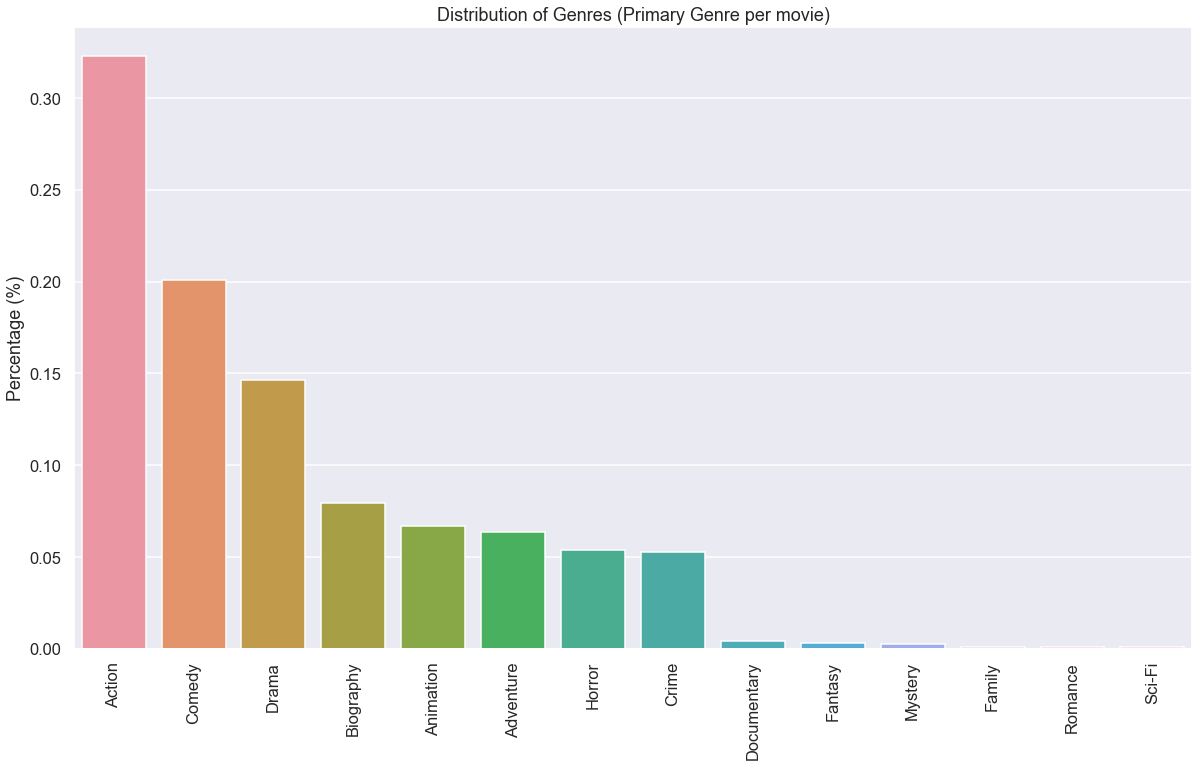

In [942]:
Y = df['new_genre'].value_counts(normalize = True)
X = Y.index

plt.figure(figsize = (17, 11))
ax = sns.barplot(X, Y)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Distribution of Genres (Primary Genre per movie)")
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.show()

ax.figure.savefig("PNG/Genre_Distribution.png")

Again, very action dominant market.  

## Popularity

### What are the most popular films? (Based on the TMDB popularity data)

In [943]:
df.sort_values(by='popularity', ascending = False).title[0:10]

594              journey 2: the mysterious island
1898                       avengers: infinity war
1146                                 interstellar
65                                      inception
991     the hobbit: the battle of the five armies
2775                                      aladdin
916                                        frozen
862                  teenage mutant ninja turtles
1025        the hunger games: mockingjay - part 1
1236                                   big hero 6
Name: title, dtype: object

## What are the most popular genre? 

Before I begin, I'll normalize popularity and imdb rating measure since their scale is arbitrary.

In [944]:
df['popularity_z'] = df.popularity.apply(lambda x: (x-df.popularity.mean())/(df.popularity.std()))
df['rating_z_IMDB'] = df.avg_rating_imdb.apply(lambda x: (x-df.avg_rating_imdb.mean())/(df.avg_rating_imdb.std()))

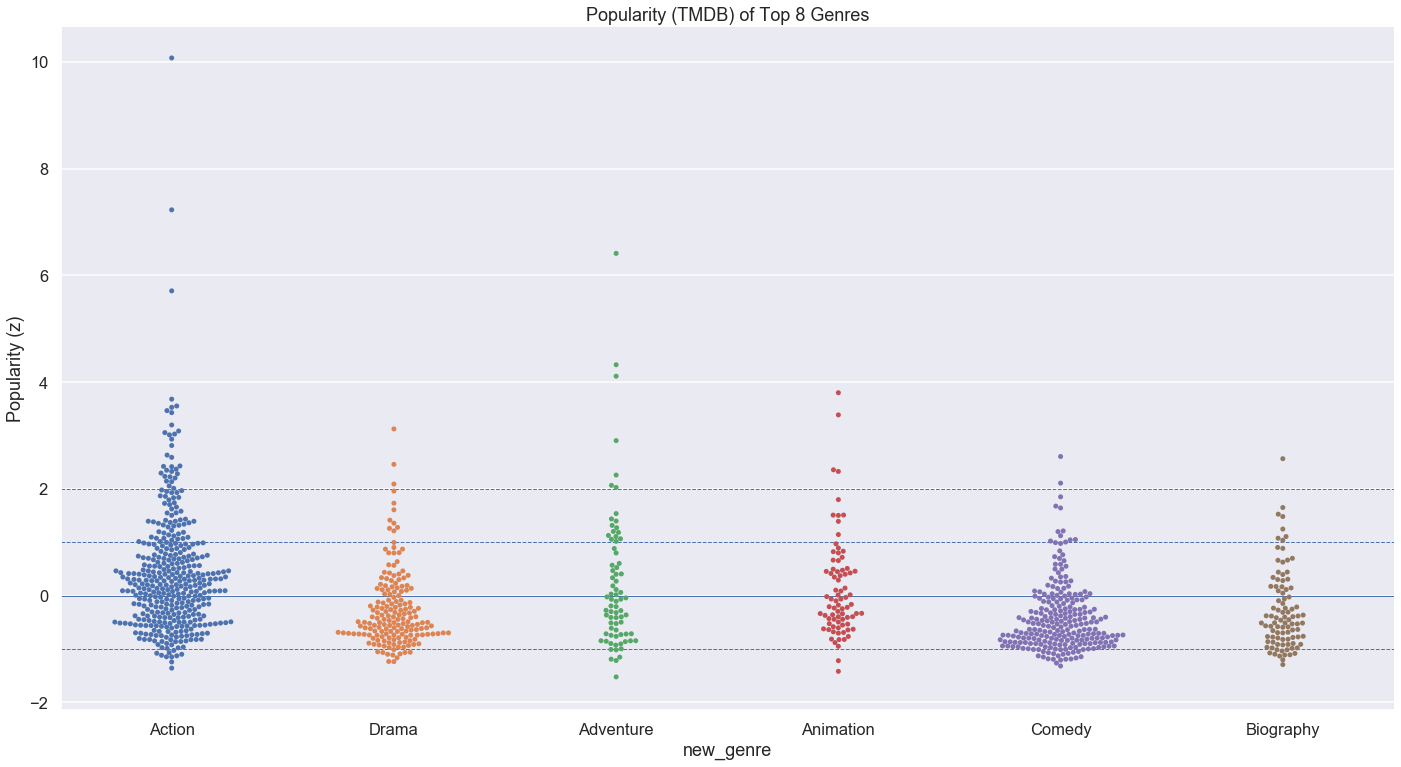

In [945]:
g = sns.catplot(x="new_genre", y="popularity_z", hue="new_genre", data=df[df.new_genre.isin(top6)], 
                kind = 'swarm', aspect = 1.8, height = 11)

g.set(title = "Popularity (TMDB) of Top 8 Genres", ylabel = "Popularity (z)")
plt.axhline(0, ls='-', lw = 1)
plt.axhline(1, ls='--', lw = 1)
plt.axhline(-1, ls='--', lw = 1)
plt.axhline(2, ls='--', lw = 1)

plt.tight_layout()
plt.show()

g.savefig("PNG/Popularity_genre.png")

But z-score is not too intuitive (especially with these insane outliers...)

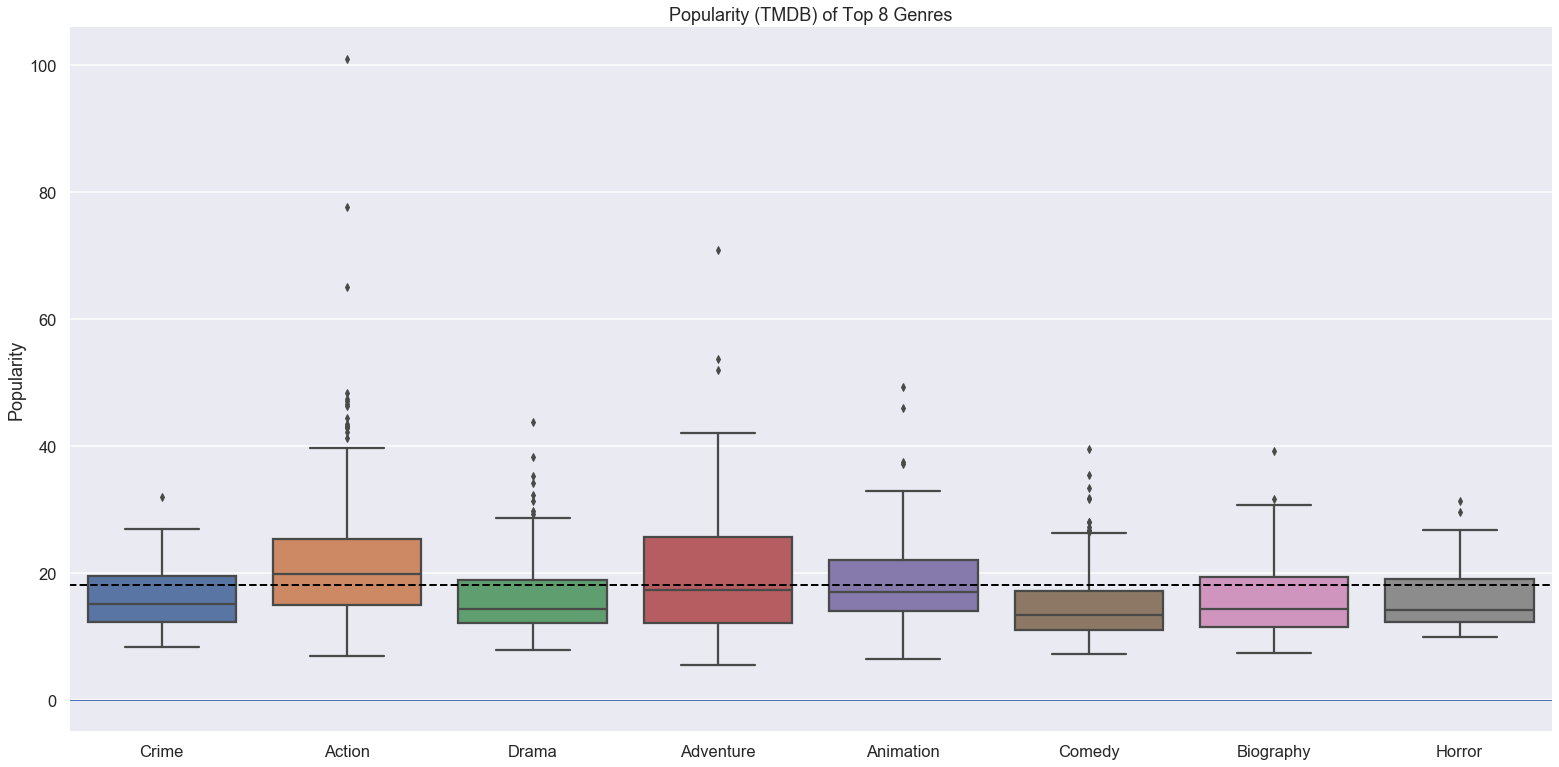

In [946]:
g = sns.catplot(x="new_genre", y="popularity", data=df[df.new_genre.isin(top8)], 
                kind = 'box', aspect = 2, height = 11)

g.set(title = "Popularity (TMDB) of Top 8 Genres", ylabel = "Popularity", xlabel = "")
plt.axhline(0, ls='-', lw = 1)
plt.axhline(df.popularity.mean(), ls='--', lw = 2, color = 'black')

plt.tight_layout()
plt.show()

g.savefig("PNG/Popularity_genre.png")

Other than action, adventure, animation most movies are not as popular.  
For drama and comedy, some movies seem to gain a relatively large popularity.  
But most comedy, crime and horror films seem to stay in lower tier.


## Rating

### What are the highest rated films? (IMDB)

In [947]:
df.sort_values(by='avg_rating_imdb', ascending = False).title[0:10]

65                   inception
1146              interstellar
2355                    dangal
1529                  whiplash
1898    avengers: infinity war
315      the dark knight rises
540           django unchained
2331                      coco
12                 toy story 3
280                  incendies
Name: title, dtype: object

### Highest rated genres? 

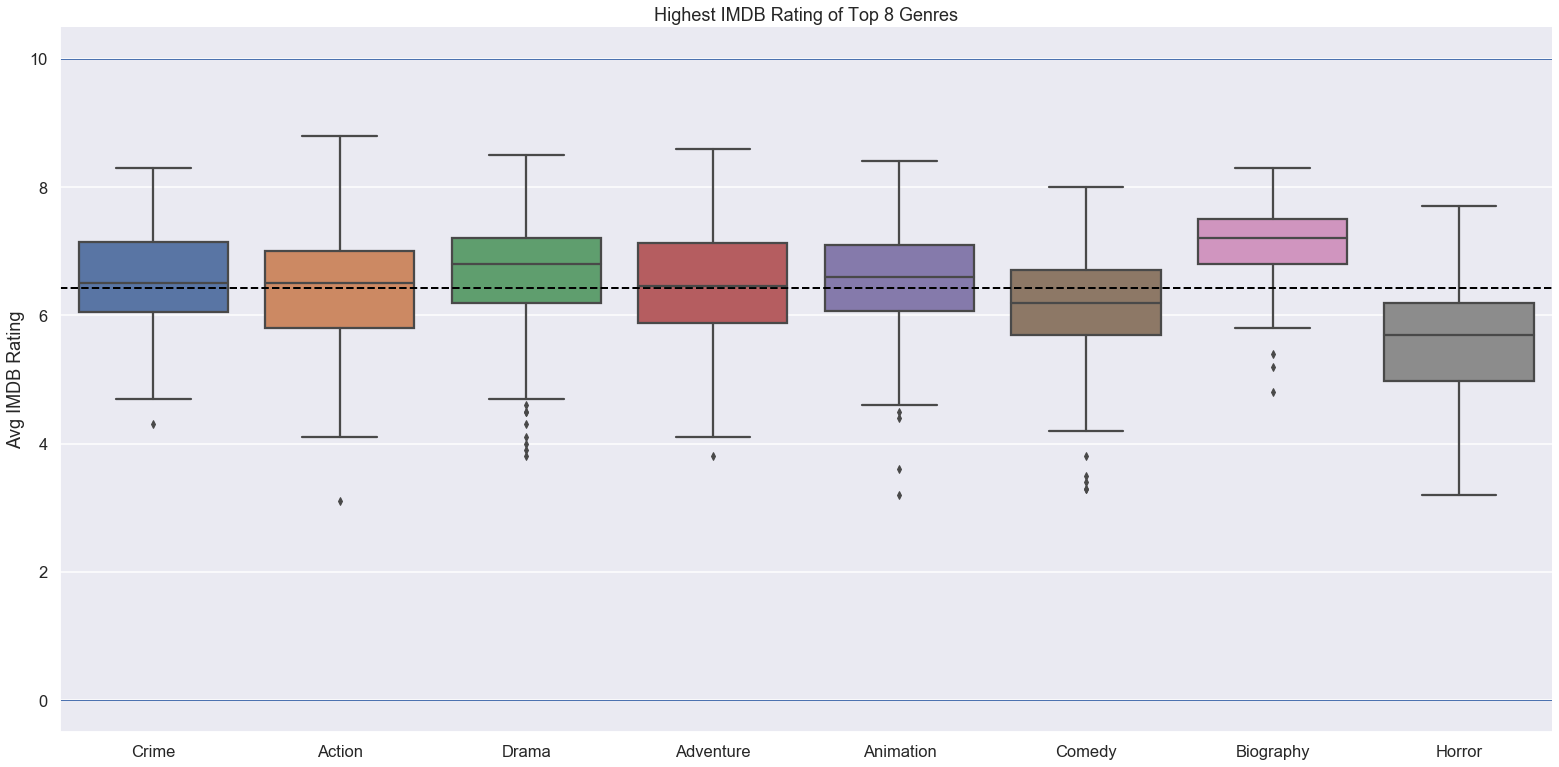

In [949]:
g = sns.catplot(x="new_genre", y="avg_rating_imdb", data=df[df.new_genre.isin(top8)], 
                kind = 'box', aspect = 2, height = 11)

g.set(title = "Highest IMDB Rating of Top 8 Genres", ylabel = "Avg IMDB Rating", xlabel = "")
plt.axhline(0, ls='-', lw = 1)
plt.axhline(10, ls='-', lw = 1)

plt.axhline(df.avg_rating_imdb.mean(), ls='--', lw = 2, color = 'black')

plt.tight_layout()
plt.show()

g.savefig("PNG/Rating_genre.png")

With a handful of exception, drama tends to score high on ratings.  
Biography usually has high ratings.   
Horror movies are hardly ever rated high.

## Growing trend of rating in each genre?

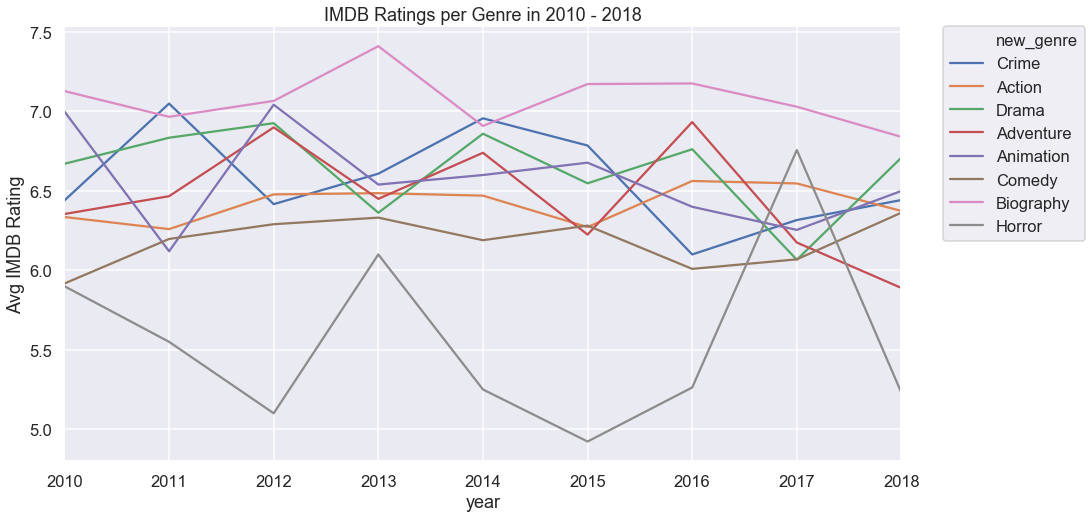

In [950]:
dat = df[df.new_genre.isin(top8)]

plt.figure(figsize = (15, 8))
sns.lineplot(x = 'year', y = 'avg_rating_imdb', hue = 'new_genre', data = dat, markers = True, err_style = None )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("IMDB Ratings per Genre in 2010 - 2018")
plt.ylabel("Avg IMDB Rating")
plt.xlim([2010, 2018])
plt.xticks(list(range(2010,2019)))
plt.show()

There's a lot of variability here to make much claim. 

## Revenue to Budget Ratio 
We will assume that high revenue to production budget ratio means high profitability.

### Which films have the best budget to gross ratio since 2000? Internationally and domestically?

In [951]:
df.sort_values(by='rev2bud_dom', ascending = False).title[0:10]

1896              the gallows
651          the devil inside
2760                  get out
192     paranormal activity 2
135         the last exorcism
2044                 war room
1166                the purge
597     paranormal activity 3
2450                moonlight
834         chernobyl diaries
Name: title, dtype: object

In [952]:
df.sort_values(by='rev2bud_int', ascending = False).title[0:10]

1896              the gallows
651          the devil inside
192     paranormal activity 2
2760                  get out
2450                moonlight
834         chernobyl diaries
597     paranormal activity 3
1553                annabelle
135         the last exorcism
2355                   dangal
Name: title, dtype: object

It seems like horror movies yields generally high revenue to budget. This is worth exploring further.


### Which studios have the highest revenue to budget ratio? Internationally and domestically?

In [953]:
print(df.groupby('studio').rev2bud_dom.mean().sort_values(ascending=False)[0:10])
print(df.groupby('studio').rev2bud_int.mean().sort_values(ascending=False)[0:10])

studio
ParV       13.600000
WB (NL)     8.540100
BH Tilt     4.127708
TriS        3.896375
Par.        3.554921
Affirm      3.510000
A24         3.272177
PNT         3.215000
Wein.       3.123100
Uni.        2.951727
Name: rev2bud_dom, dtype: float64
studio
UTV         31.015789
WB (NL)     16.746074
ParV        14.920000
Orch.        9.540000
GrtIndia     8.783333
Par.         7.038253
BH Tilt      6.636417
PNT          6.256000
Uni.         5.880974
Wein.        5.464231
Name: rev2bud_int, dtype: float64


## Yearly Trends

### Has the popular genre has changed in past 10 years? 

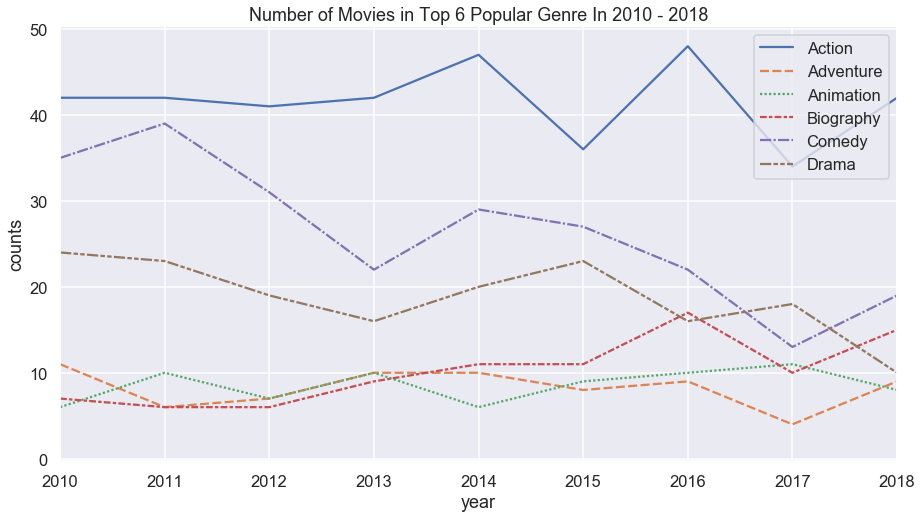

In [954]:
dat = df[df.new_genre.isin(top6)]
dat = dat.groupby('new_genre').year.value_counts()
dat = dat.unstack(0)

plt.figure(figsize = (15, 8))
sns.lineplot(data = dat, sort=False)
plt.title("Number of Movies in Top 6 Popular Genre In 2010 - 2018")
plt.ylabel("counts")
plt.xlim([2010, 2018])
plt.xticks(list(range(2010,2019)))
plt.show()

There have been steady number of actions throughout.  
But less and less comedy and drama.  
biography is slowly picking up. 

## WorldWide Gross By Genre

In [957]:
dat = df[df.new_genre.isin(top6)]
dat = pd.melt(dat, id_vars=['new_genre'],
              value_vars=['worldwide_gross', 'domestic_gross', 'production_budget'])

<Figure size 864x432 with 0 Axes>

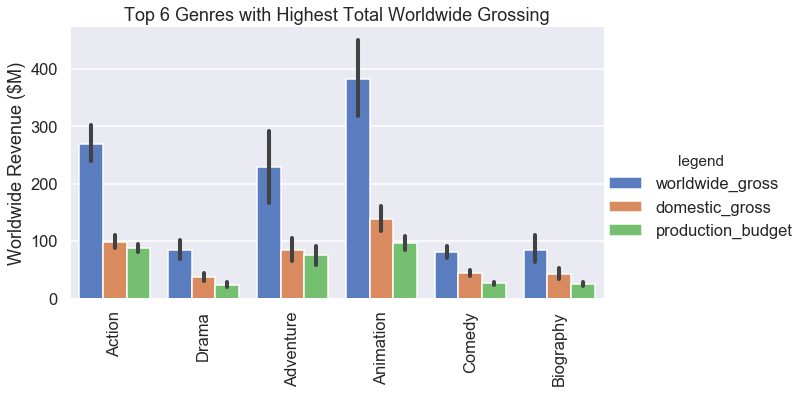

In [960]:
plt.figure(figsize = (12,6))
g = sns.catplot(x="new_genre", y="value", hue="variable", data=dat, kind="bar", 
                palette="muted", aspect = 1.8)
g.set_xticklabels(rotation=90)
g.set(title = "Top 6 Genres with Highest Total Worldwide Grossing", ylabel = "Worldwide Revenue ($M)", xlabel = "")
g._legend.set_title("legend")
#for t, l in zip(g._legend.texts, ['a', 'b', 'c']): t.set_text(l)

plt.show()


On average, animation yields highest worldwide and domestic gross revenue. 

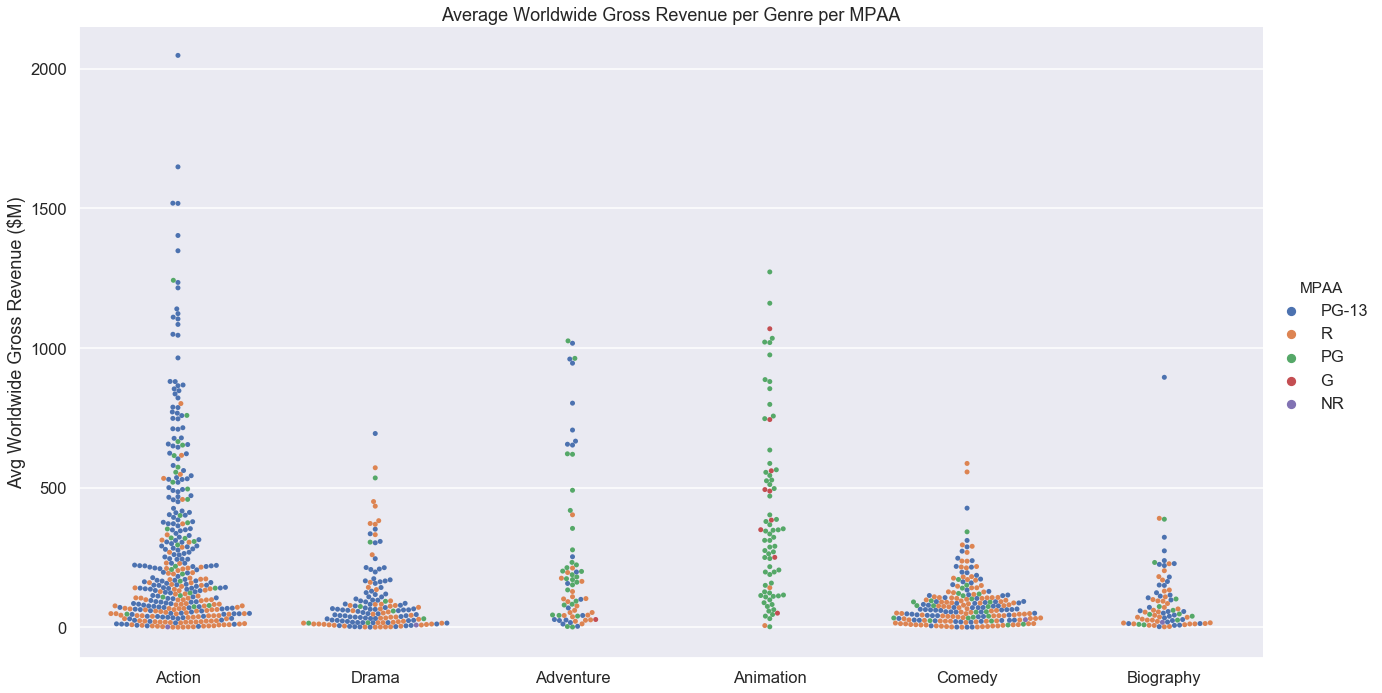

In [966]:
dat = df[df.new_genre.isin(top6)]

g = sns.catplot(x="new_genre", y="worldwide_gross", hue="MPAA", data=dat, kind = 'swarm', aspect = 1.8, height = 10)
g.set(title = "Average Worldwide Gross Revenue per Genre per MPAA", xlabel = "", ylabel = "Avg Worldwide Gross Revenue ($M)")
plt.show()

g.savefig("PNG/MPGG_Worldwide_Genre.png")

And most of animation are rated PG.  
Most of the successful action movies are PG-13 or PG.  
All of the successful adventure movies are PG or PG-13. 

On the other hand, if making comedy or drama, targeting adult population actually can be more successful.  

In [981]:
# Just different visualization.
dat = df[df.new_genre.isin(top8)]
dat = dat[['new_genre', 'MPAA', 'worldwide_gross', 'month', 'year']]
dat2 = dat.groupby(['new_genre', 'MPAA'])['worldwide_gross'].mean()
dat2 = dat2.reset_index()

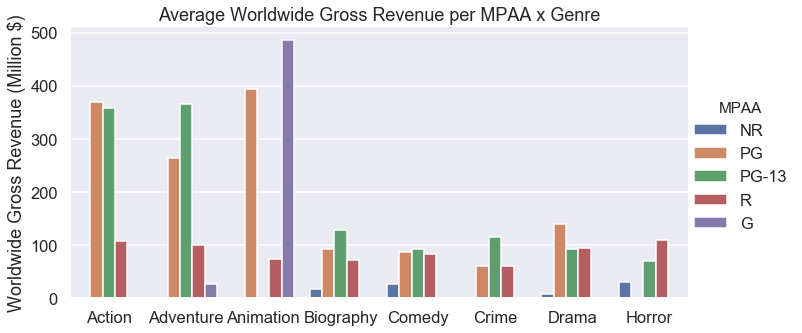

In [982]:
g = sns.catplot(x="new_genre", y="worldwide_gross", hue="MPAA", data=dat2, kind="bar", aspect = 2)
g.set(title = "Average Worldwide Gross Revenue per MPAA x Genre", xlabel = "", ylabel = "Worldwide Gross Revenue (Million $)")
plt.show()

g.savefig("PNG/MPGG_Worldwide_Genre_2.png")

## Monthly Trends

### Total Gross based on release month

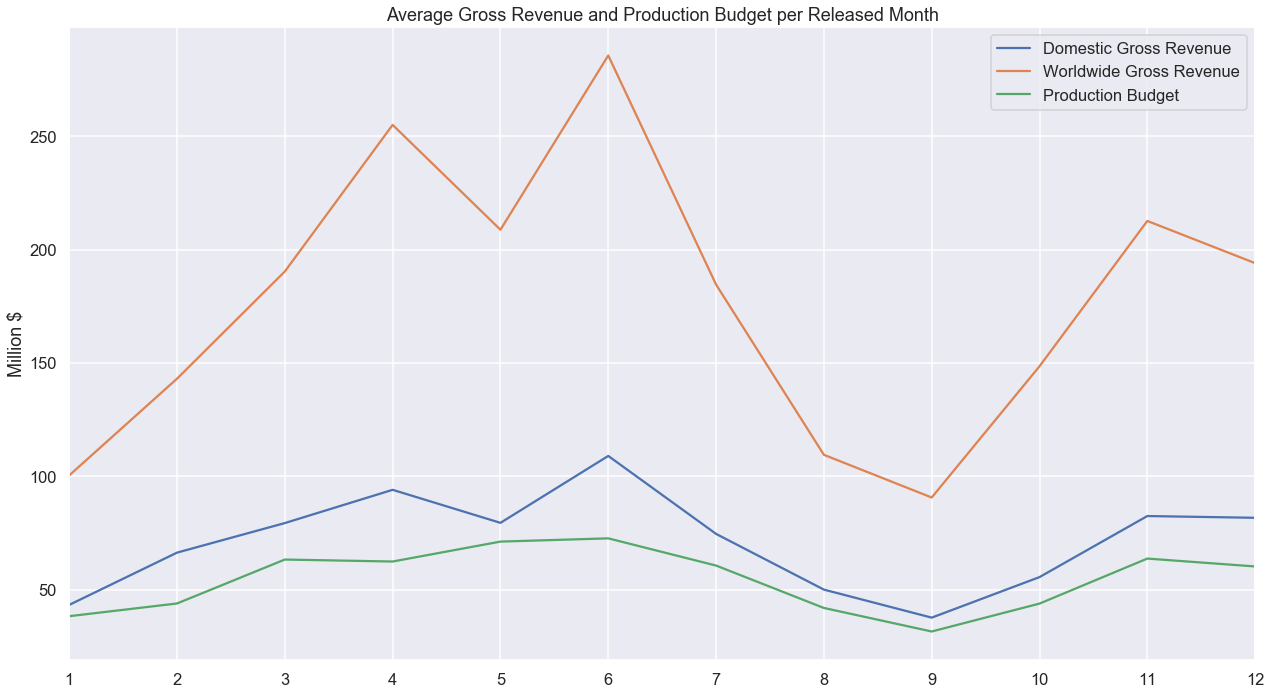

In [967]:
dom_gross = df.groupby('month').domestic_gross.mean()
int_gross = df.groupby('month').worldwide_gross.mean()
prod_bud = df.groupby('month').production_budget.mean()

fig = plt.figure(figsize = (18, 10))
sns.lineplot(data = dom_gross, label = 'Domestic Gross Revenue', sort = False)
sns.lineplot(data = int_gross, label = 'Worldwide Gross Revenue', sort = False)
sns.lineplot(data = prod_bud, label = 'Production Budget', sort = False)

plt.ylabel("Million $")
plt.title("Average Gross Revenue and Production Budget per Released Month")
plt.xlim([1, 12])
plt.xticks(list(range(1,13)))

plt.tight_layout()
plt.show()

fig.savefig("PNG/Average_Grossing_per_Release_Month.png")

April and June seems to be peak time to release high-profitable movies.  
But release award targeting movies after these prime time to maximize chance of winning.  

### Relative Success
Using normalized revenue data

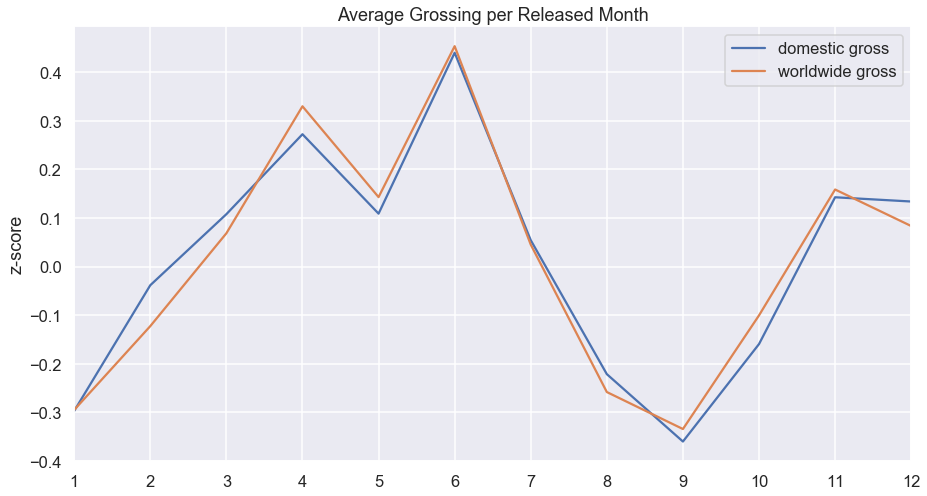

In [969]:
dom_gross = df.groupby('month').domestic_gross_z.mean()
int_gross = df.groupby('month').worldwide_gross_z.mean()

plt.figure(figsize = (15, 8))
sns.lineplot(data = dom_gross, label = 'domestic gross', sort = False)
sns.lineplot(data = int_gross, label = 'worldwide gross', sort = False)

plt.ylabel("z-score")
plt.title("Average Grossing per Released Month")
plt.xlim([1, 12])
plt.legend()
plt.xticks(list(range(1,13)))
plt.show()

## Rating - Revenue
Rating is important measure beyond revenue that will help establishing the new studio brand. 
Before diving in, let's see if there is any relationship between rating and return.


<Figure size 1080x864 with 0 Axes>

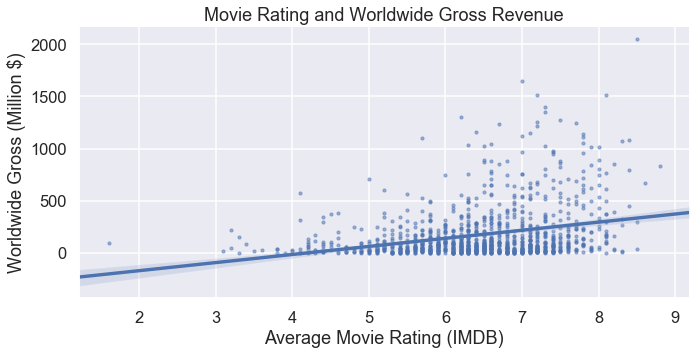

In [970]:
tmp = df[['avg_rating_imdb', 'production_budget', 'domestic_gross', 'worldwide_gross']]

plt.figure(figsize = (15, 12))
ax1 = sns.lmplot(x = "avg_rating_imdb", y = "worldwide_gross", data = tmp, scatter_kws = {"s": 10, "alpha": 0.5}, aspect = 2)

ax1.set(title = "Movie Rating and Worldwide Gross Revenue", xlabel = "Average Movie Rating (IMDB)", ylabel = "Worldwide Gross (Million $)")

plt.show()

# There isn't too strong relationship here

In [971]:
tmp.corr()

,avg_rating_imdb,production_budget,domestic_gross,worldwide_gross
avg_rating_imdb,1.000000,0.176612,0.310849,0.295082
production_budget,0.176612,1.000000,0.679783,0.765051
domestic_gross,0.310849,0.679783,1.000000,0.940231
worldwide_gross,0.295082,0.765051,0.940231,1.000000


Rating doesn't seem that strongly correlates with revenue. Definitely not with budget.  

## Popularity and Success
Does popularity score correlate with gross revenue?

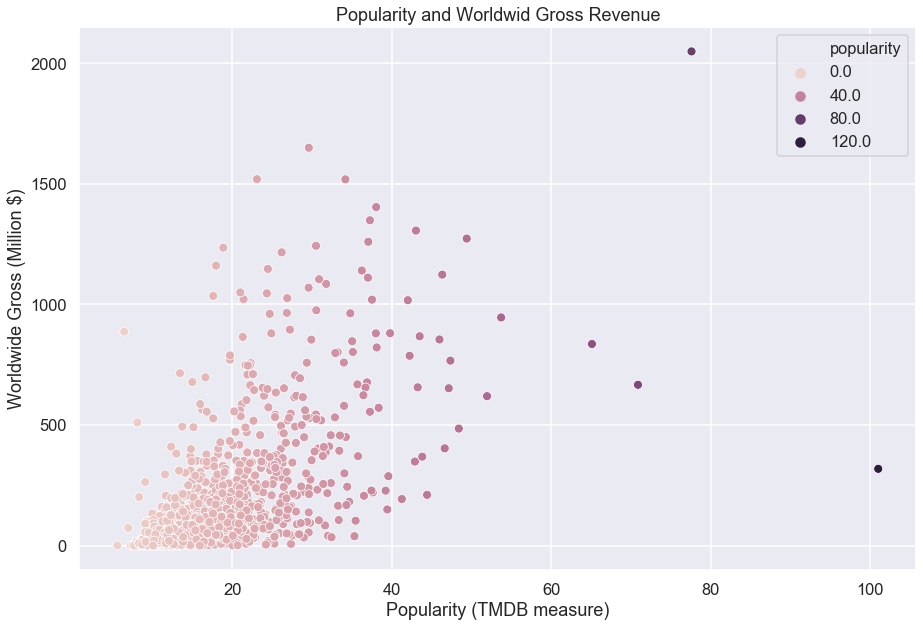

In [972]:
tmp = df[['popularity', 'production_budget', 'domestic_gross', 'worldwide_gross']]

plt.figure(figsize = (15, 10))
ax1 = sns.scatterplot(x = "popularity", y = "worldwide_gross", hue = 'popularity', \
                      data = tmp)

ax1.set_xlabel("Popularity (TMDB measure)")
ax1.set_ylabel("Worldwide Gross (Million $)")
ax1.set_title("Popularity and Worldwid Gross Revenue")
plt.show()

# It seems like popularity does relate to the gross revenue. 
ax1.figure.savefig("PNG/Popularity_Revenue_Corr.png")

In [973]:
tmp.corr()

,popularity,production_budget,domestic_gross,worldwide_gross
popularity,1.000000,0.551229,0.579177,0.617004
production_budget,0.551229,1.000000,0.679783,0.765051
domestic_gross,0.579177,0.679783,1.000000,0.940231
worldwide_gross,0.617004,0.765051,0.940231,1.000000


Popularity rating from TMDB does positively correlate with the worldwide gross. 

### Runtime and Revenue
Any relationship between runtime and revenue?  
How about for each genre?

<Figure size 1080x1080 with 0 Axes>

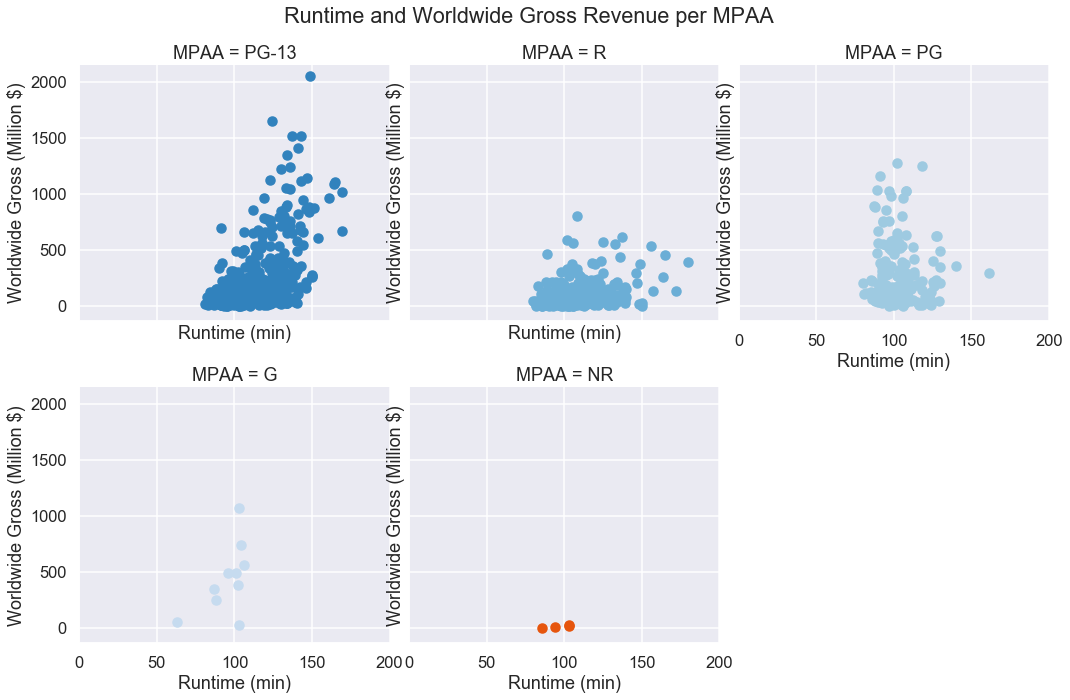

In [983]:
# Selecting only necessary data
dat = df[df.new_genre.isin(top6)]
dat = dat[['new_genre', 'MPAA', 'worldwide_gross', 'runtime_minutes']]

fig = plt.figure(figsize = (15, 15))

g = sns.FacetGrid(dat, col="MPAA", hue="MPAA", palette="tab20c", col_wrap=3, height=5)
g = g.map(plt.scatter, "runtime_minutes", "worldwide_gross")

g.set(xlim=(0, 200), xlabel = "Runtime (min)", ylabel = "Worldwide Gross (Million $)")
g.fig.subplots_adjust(top=0.9)

g.fig.suptitle('Runtime and Worldwide Gross Revenue per MPAA')
plt.show()


There might be some relationship for PG-13 movies. But not much.

<Figure size 1080x1080 with 0 Axes>

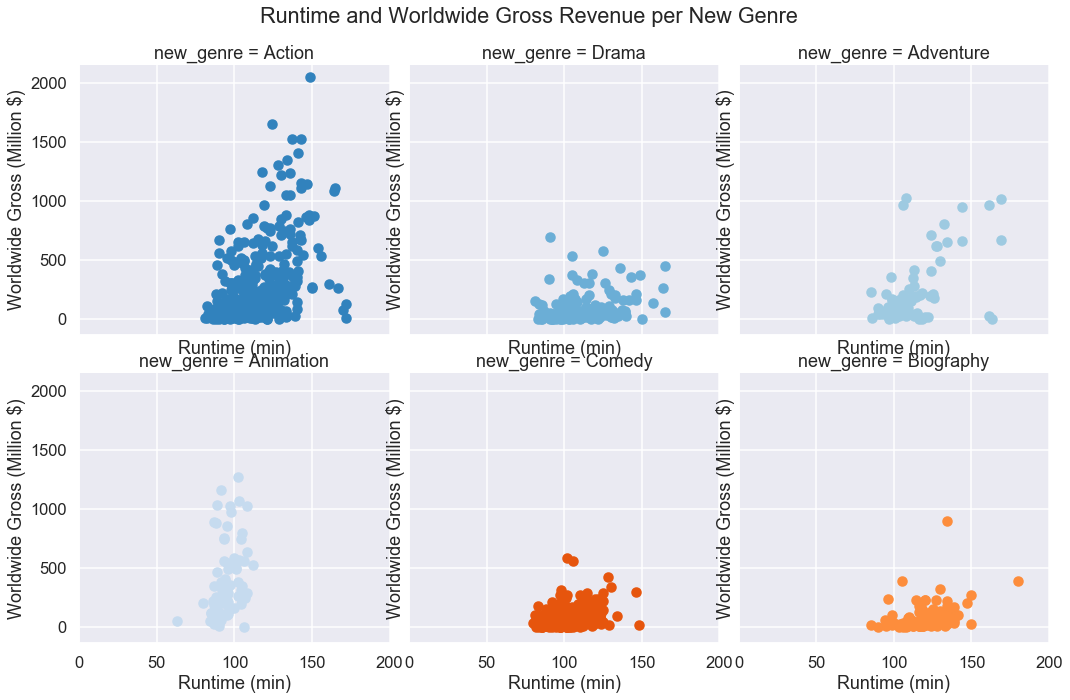

In [984]:
fig = plt.figure(figsize = (15, 15))

g = sns.FacetGrid(dat, col="new_genre", hue="new_genre", palette="tab20c", col_wrap=3, height=5)
g = g.map(plt.scatter, "runtime_minutes", "worldwide_gross")

g.set(xlim=(0, 200), xlabel = "Runtime (min)", ylabel = "Worldwide Gross (Million $)")
g.fig.subplots_adjust(top=0.9)

g.fig.suptitle('Runtime and Worldwide Gross Revenue per New Genre')
plt.show()


Not much relationship. One on Adventure might just be difference from MPAA rating within adventure. 